4


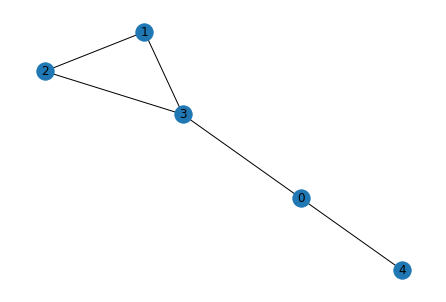

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.tree.mst import SpanningTreeIterator

from itertools import product

from query_graphs.query_graphs import QueryGraphs

query_graph = QueryGraphs().get_graph_7(4)
query_graph = QueryGraphs().get_graph_8(5)
#query_graph = nx.path_graph(10)

n_joins = len(query_graph.edges) - len(nx.cycle_basis(query_graph))
max_number_of_levels = n_joins
print(max_number_of_levels)
levels = range(max_number_of_levels)
variables = set()
tables = query_graph.nodes()
query_graph.add_edge(1,2)

#cardinality = {}
#for node in query_graph.nodes(data=True):
#    cardinality[node[0]] = node[1]['cardinality']

#selectivity = {}
#for edge in query_graph.edges(data=True):
#    selectivity[(edge[0], edge[1])] = edge[2]['selectivity']
    
nx.draw(query_graph, with_labels=True)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from itertools import combinations

def get_connected_subgraphs_dfs(graph, node, n):
    connected_subgraphs = set()
    
    # Function to perform DFS to find connected subgraphs of size n
    def dfs(start_node, path):
        
        if len(path) == n + 1:
            connected_subgraphs.add(tuple(path))
            return
        
        for r in range(1, n - len(path) + 2):
            for neighbors_combination in combinations(graph.neighbors(start_node), r):
                for neighbor in neighbors_combination:
                    if neighbor not in path:
                        dfs(neighbor, path.union(set(neighbors_combination)))
    
    for r in range(1, n + 1):
        for neighbors_combination in combinations(graph.neighbors(node), r):
            for neighbor in neighbors_combination:
                dfs(neighbor, set(list(neighbors_combination) + [node]))
    
    return connected_subgraphs

In [3]:
class Variable:
    
    def __init__(self, query_graph, subgraphs, rel1, rel2, level, base_labelings):
        self.query_graph = query_graph
        self.subgraphs = subgraphs
        self.level = level
        self.local_cost = 0
        self.labelings = []
        for base_labeling in base_labelings:
            self.labelings.append(base_labeling + [(rel1, rel2, level)])
        self.rel1 = rel1
        self.rel2 = rel2
        
    def get_labelings(self):
        return self.labelings
    
    def __str__(self) -> str:
        return f'Variable({self.rel1}, {self.rel2}, {self.level}) with labelings {self.labelings} and local cost {self.local_cost}'

In [4]:
variables = {}
#all_connected_subgraphs = set()

for level in levels:
    for edge in query_graph.edges(data=True):
        
        if level == 0:
            subgraph = frozenset([edge[0], edge[1]])
            variables[subgraph] = Variable(query_graph, subgraph, edge[0], edge[1], level, [[]])
        else:
            join1 = edge[0]
            join2 = edge[1]
            
            query_graph_copy = query_graph.copy()
            edge_to_remove = (join1, join2)
            query_graph_copy.remove_edge(*edge_to_remove)
            
            connected_subgraphs = get_connected_subgraphs_dfs(query_graph_copy, join1, level)
            connected_subgraphs = connected_subgraphs.union(get_connected_subgraphs_dfs(query_graph_copy, join2, level))
            
            #print("Join: ", edge)
            #print("Level: ", level)
            #print(connected_subgraphs)
            #all_connected_subgraphs = all_connected_subgraphs.union(connected_subgraphs)
            
            for subgraph in connected_subgraphs:
                new_subgraph = frozenset(subgraph + (join1, join2))
                subgraph = frozenset(subgraph)
                #print(variables)
                variables[new_subgraph] = Variable(query_graph, subgraph, join1, join2, level, variables[subgraph].get_labelings())

In [5]:
for v in variables:
    print(v)
    print(variables[v])

frozenset({0, 3})
Variable(0, 3, 0) with labelings [[(0, 3, 0)]] and local cost 0
frozenset({0, 4})
Variable(0, 4, 0) with labelings [[(0, 4, 0)]] and local cost 0
frozenset({1, 3})
Variable(1, 3, 0) with labelings [[(1, 3, 0)]] and local cost 0
frozenset({1, 2})
Variable(1, 2, 0) with labelings [[(1, 2, 0)]] and local cost 0
frozenset({2, 3})
Variable(2, 3, 0) with labelings [[(2, 3, 0)]] and local cost 0
frozenset({0, 2, 3})
Variable(2, 3, 1) with labelings [[(0, 3, 0), (2, 3, 1)]] and local cost 0
frozenset({0, 1, 3})
Variable(1, 3, 1) with labelings [[(0, 3, 0), (1, 3, 1)]] and local cost 0
frozenset({0, 3, 4})
Variable(0, 4, 1) with labelings [[(0, 3, 0), (0, 4, 1)]] and local cost 0
frozenset({1, 2, 3})
Variable(2, 3, 2) with labelings [[(1, 3, 0), (2, 3, 1), (1, 3, 2), (1, 2, 2), (2, 3, 2)]] and local cost 0
frozenset({0, 1, 2, 3})
Variable(2, 3, 3) with labelings [[(0, 3, 0), (1, 3, 1), (2, 3, 2), (1, 3, 3), (1, 2, 3), (2, 3, 3)]] and local cost 0
frozenset({0, 1, 3, 4})
Variab